In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [4]:
def loadcleandata (file_path):  #loading data
    data = pd.read_csv(file_path)
    columns = [
        "Format", "Total Matches Played", "England Wins", "England Losses",
        "Australia Wins", "Australia Losses", "Ties/Draws", "No Result",
        "England Win %", "Australia Win %", "Top Batter", "Top Bowler",
        "Aus Avg vs Eng Pace", "Aus Avg vs Eng Spin",
        "Eng Avg vs Aus Pace", "Eng Avg vs Aus Spin"
    ]
    data = data.iloc[2:5].reset_index(drop=True)
    data.columns = columns

    data["England Win %"] = data["England Win %"].str.rstrip('%').astype(float)
    data["Australia Win %"] = data["Australia Win %"].str.rstrip('%').astype(float)
    return data

In [5]:
def linearregeression (data):  #regression model
    encoder = LabelEncoder()
    data["Format Encoded"] = encoder.fit_transform(data["Format"])

    X = data[["Format Encoded"]]
    y_eng = data["England Win %"]
    y_aus = data["Australia Win %"]

    model_eng = LinearRegression().fit(X, y_eng)
    model_aus = LinearRegression().fit(X, y_aus)

    data["Predicted England Win %"] = model_eng.predict(X)
    data["Predicted Australia Win %"] = model_aus.predict(X)

    print("England MSE:", mean_squared_error(y_eng, data["Predicted England Win %"]))
    print("Australia MSE:", mean_squared_error(y_aus, data["Predicted Australia Win %"]))

    return data

In [6]:
def visualization (data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["Format"], data["England Win %"], label="England Actual", marker="o", color="blue")
    plt.plot(data["Format"], data["Predicted England Win %"], label="England Predicted", linestyle="--", color="skyblue")
    plt.plot(data["Format"], data["Australia Win %"], label="Australia Actual", marker="o", color="red")
    plt.plot(data["Format"], data["Predicted Australia Win %"], label="Australia Predicted", linestyle="--", color="salmon")

    for i in range(len(data)):
        if data["Predicted England Win %"][i] > data["Predicted Australia Win %"][i]:
            plt.text(data["Format"][i], data["Predicted England Win %"][i], "England", color="green", ha='center', va='bottom')
        else:
            plt.text(data["Format"][i], data["Predicted Australia Win %"][i], "Australia", color="green", ha='center', va='bottom')

    plt.title("Actual vs Predicted Win Percentages with Winning Predictions")
    plt.xlabel("Match Format")
    plt.ylabel("Win Percentage")
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
# New Function: Visualize Win Probabilities as Bar Chart
def win_visualsation(data):
    teams = ['England', 'Australia']
    win_probabilities = [
        data["Predicted England Win %"].mean(),
        data["Predicted Australia Win %"].mean()
    ]
    colors = ['#FF9999', '#90EE90']  # Red and green shades

    plt.figure(figsize=(8, 2))
    bars = plt.barh(teams, win_probabilities, color=colors, edgecolor='black', height=0.5)

    for bar, probability in zip(bars, win_probabilities):
        plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                 f"{probability:.2f}%", ha='center', va='center', color='black', fontsize=12, weight='bold')

    plt.title('Win Probability', fontsize=14, pad=20)
    plt.xlim(0, 100)
    plt.xlabel('Probability (%)', fontsize=12)
    plt.gca().invert_yaxis()
    plt.box(False)
    plt.xticks([])
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [13]:
# Main function
def main():
    file_path = "australia vs england.csv"
    data = loadcleandata(file_path)
    data = linearregeression(data)
    visualization(data)
    win_visualsation(data)

England MSE: 42.56568888888891
Australia MSE: 33.86644999999999


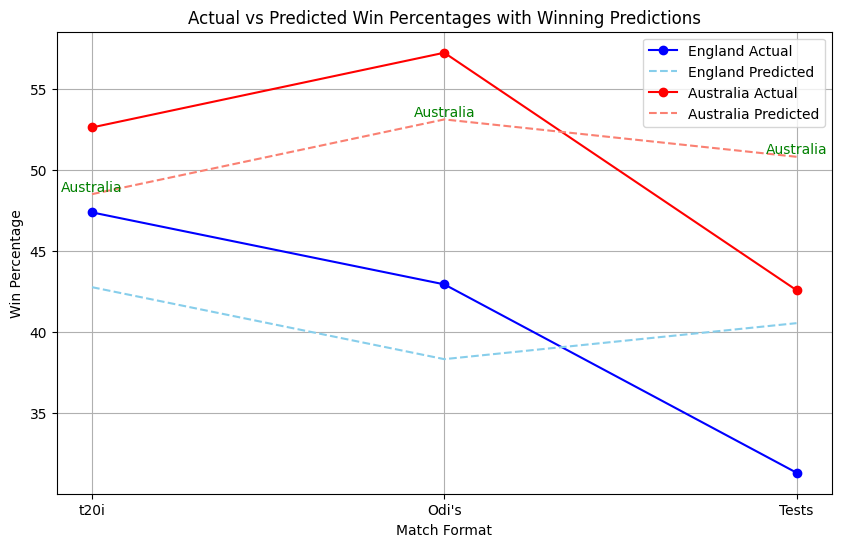

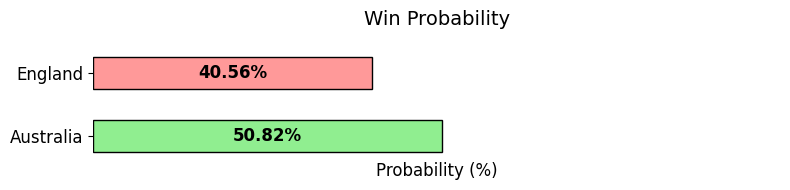

In [14]:
if __name__ == "__main__":
    main()